In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# create a dataframe containing the successful number of hits, the sample size (n) and an estimator for p (p_hat)
# where p_hat is an estimate for the probability of hitting a 1 with either an Event RPG or Iron Scimitar
def get_probability_df(df, weapon_type):
    attack_speed = {   "Event RPG"   : 1.8,  # Event RPG attacks once every 1.8s 
                     "Iron Scimitar" : 2.4 } # Iron Scimitar attacks once every 2.4s
    
    successful_attacks = df.loc[1:, "Exp Gained"].to_numpy() / 4
    total_attacks = df.loc[1:, "Time (min)"].to_numpy() * 60 / attack_speed[weapon_type]
    total_attacks = [math.floor(attacks) for attacks in total_attacks]
    p_hat = successful_attacks / total_attacks
    
    d = { "Successful Attacks" : successful_attacks,
          "Total Attacks"      : total_attacks,
          "p hat"              : p_hat }
    
    probability_df = pd.DataFrame(data = d)
    probability_df["Weapon"] = weapon_type
    
    return probability_df

def display_parameters(n, p, q):
    print("    n:", n)
    print("p_hat:", p)
    print("    q:", q)
    
# pooled test statistic
def calculate_test_statistic(n1, n2, p1, p2):
    p = (((n1) * (p1)) + ((n2) * (p2))) / (n1 + n2)
    sigma = math.sqrt(p * (1 - p) * ((1 / n1) + (1 / n2)))
    
    z  = (p1 - p2) / sigma
    rounded_z = round(z, 6)
    
    return rounded_z

In [3]:
# load processed data
combined_df = pd.read_csv("data/combined_data.csv")

In [4]:
# transform data 
section_length = len(combined_df) // 4
trimmed_rpg_df = combined_df.iloc[:section_length, :].drop("Exp Type", axis = 1)
trimmed_scim_df = combined_df.iloc[section_length * 2 + 1:section_length * 3, :].drop("Exp Type", axis = 1)

# calculate and add the probabilities of hitting a 1 to the dataframes
rpg_probability_df = get_probability_df(trimmed_rpg_df, "Event RPG")
scim_probability_df = get_probability_df(trimmed_scim_df, "Iron Scimitar")

# transform data for visualization
combined_probability_df = rpg_probability_df.append(scim_probability_df)
combined_probability_df_length = int(len(combined_probability_df))

In [5]:
# write processed data to csv
combined_probability_df.to_csv("data/combined_probability_data.csv", index = False)

In [6]:
# load processed data
combined_probability_df = pd.read_csv("data/combined_probability_data.csv")

In [7]:
# Event RPG sample size (n), p estimator (p_hat) and q
rpg_row = combined_probability_df_length // 2 - 1
rpg_n, rpg_p = combined_probability_df.iloc[rpg_row, 1], round(combined_probability_df.iloc[rpg_row, 2], 6)
rpg_q = 1 - rpg_p

print("--- Event RPG --- ")
display_parameters(rpg_n, rpg_p, rpg_q)

--- Event RPG --- 
    n: 6000
p_hat: 0.190167
    q: 0.809833


In [8]:
# Iron Scimitar sample size, p estimator and q
scim_row = combined_probability_df_length - 1
scim_n, scim_p = combined_probability_df.iloc[scim_row, 1], round(combined_probability_df.iloc[scim_row, 2], 6)
scim_q = 1 - scim_p

print("--- Iron Scimitar --- ")
display_parameters(scim_n, scim_p, scim_q)

--- Iron Scimitar --- 
    n: 4500
p_hat: 0.214889
    q: 0.785111


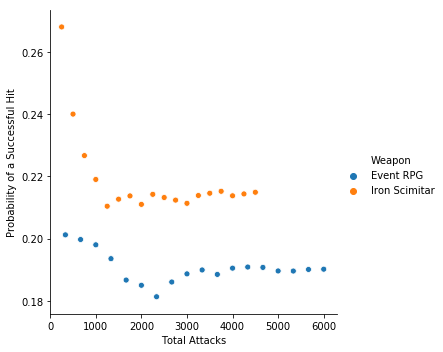

In [9]:
# visualize trend of p_hat as sample size n increases 
success_scatter = sns.relplot(x = "Total Attacks" ,
                              y = "p hat",
                              hue = "Weapon",
                              data = combined_probability_df)

success_scatter.set(xlabel = "Total Attacks",
                    ylabel = "Probability of a Successful Hit")

plt.xlim(5, None)
plt.show()

In [10]:
# Let R and S denote the number of successful hits using the Event RPG and Iron Scimitar respectively
# R ~ binomial(6000, 0.1905) 
# S ~ binomial(4500, 0.214889)

z = calculate_test_statistic(rpg_n, scim_n, rpg_p, scim_p)
z

-3.129622

In [11]:
# graph normal distributions 

# n = 4000 for equal sample size 
# means equal to np with standard deviation npq 
# calculate 2P(Z >= test stat)
# test stat is (mu1 - mu2) / sqrt ((sd1 + sd2) / (n))
